In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
dataset= pd.read_csv("Train.csv")
dataset

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [4]:
import sys
!{sys.executable} -m pip install -U ydata-profiling[notebook]
!jupyter nbextension enable --py widgetsnbextension

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: ok


In [5]:
from ydata_profiling import ProfileReport

df = pd.DataFrame(dataset)
profile = ProfileReport(df, title="Pandas Profiling Report")


C:\Users\LENOVO\anaconda3\Lib\site-packages\numba\core\decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)
C:\Users\LENOVO\anaconda3\Lib\site-packages\visions\backends\shared\nan_handling.py:50: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @nb.jit


In [6]:
profile.to_widgets()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

In [7]:
profile.to_file("your_report.html")

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [29]:
dataset.describe()
dataset.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [105]:
dataset.apply(lambda x: len(x.unique()))

Item_Identifier              1559
Item_Weight                   416
Item_Fat_Content                2
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     4
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [110]:
#check categorical variables
cat_col=[]
for x in dataset.dtypes.index:
    if dataset.dtypes[x]=="object":
        cat_col.append(x)
for col in cat_col:
    print(col)
    print(dataset[col].value_counts())
    print()

Item_Identifier
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64

Item_Fat_Content
Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

Outlet_Identifier
OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int

In [113]:
dataset[["Outlet_Location_Type","Item_Outlet_Sales"]].groupby(by="Outlet_Location_Type").sum()

,Item_Outlet_Sales
Outlet_Location_Type,
Tier 1,4.482059e+06
Tier 2,6.472314e+06
Tier 3,7.636753e+06


In [124]:
# dataset.groupby(by="Outlet_Location_Type").count()
dataset.pivot_table(index='Outlet_Identifier',values=["Outlet_Location_Type"], aggfunc=

TypeError: sum() takes at least 1 positional argument (0 given)

## Null Values

In [27]:
df=dataset

In [28]:
# dataset.iloc[1,1]=None
df.isnull().sum()
# round(dataset.isnull().sum()*100/len(dataset),2)

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [29]:
df["Item_Weight"].mean()

12.857645184135976

In [30]:
df["Item_Weight"]=df[["Item_Weight"]].fillna(df["Item_Weight"].mean())

In [31]:
df.Item_Fat_Content.unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [32]:
df.loc[(df['Item_Fat_Content']=='LF') | (df['Item_Fat_Content']=='low fat') | (df['Item_Fat_Content']=='LOW'),'Item_Fat_Content']='Low Fat'
df.loc[(df['Item_Fat_Content']=='reg'),'Item_Fat_Content']='Regular'
df.Item_Fat_Content.unique()

array(['Low Fat', 'Regular'], dtype=object)

<Axes: xlabel='Outlet_Size', ylabel='Outlet_Type'>

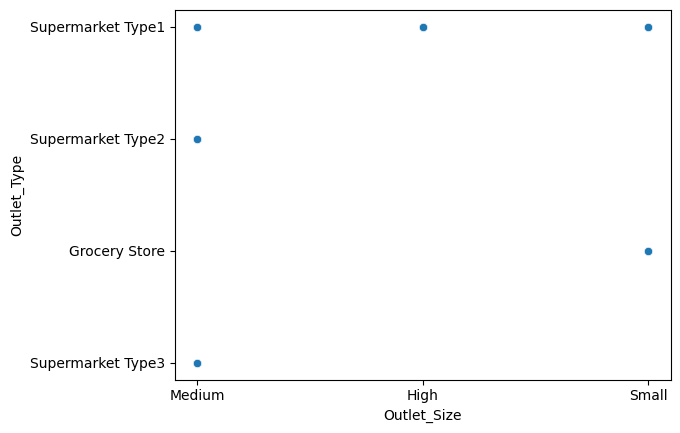

In [39]:
sns.scatterplot(data=dataset[["Outlet_Size", "Outlet_Type"]],x="Outlet_Size", y="Outlet_Type")

In [50]:
df.groupby(by="Outlet_Type").count()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales
Outlet_Type,,,,,,,,,,,
Grocery Store,1083,1083,1083,1083,1083,1083,1083,1083,528,1083,1083
Supermarket Type1,5577,5577,5577,5577,5577,5577,5577,5577,3722,5577,5577
Supermarket Type2,928,928,928,928,928,928,928,928,928,928,928
Supermarket Type3,935,935,935,935,935,935,935,935,935,935,935


<Axes: xlabel='Outlet_Type', ylabel='Outlet_Identifier'>

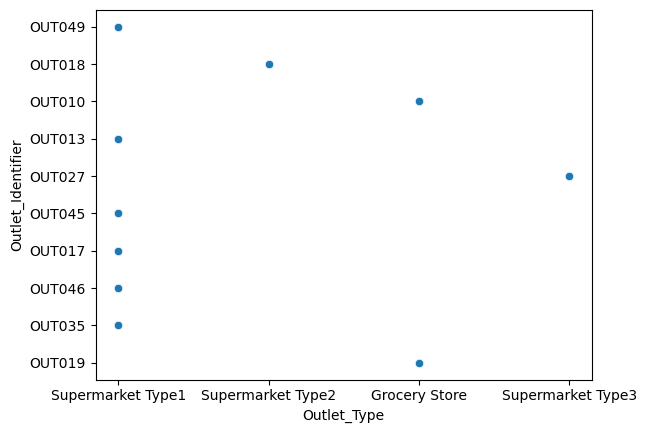

In [41]:
sns.scatterplot(data=dataset[["Outlet_Identifier", "Outlet_Type"]],y="Outlet_Identifier", x="Outlet_Type")

<Axes: xlabel='Outlet_Size', ylabel='Outlet_Type'>

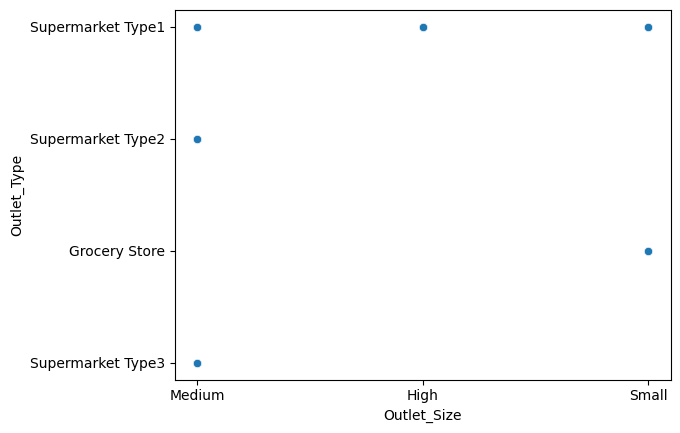

In [35]:
sns.scatterplot(data=dataset[["Outlet_Size", "Outlet_Type"]],x="Outlet_Size", y="Outlet_Type")

In [94]:
data=df[["Outlet_Type","Outlet_Size"]]
# len(x_train.index[x_train.Outlet_Size.isnull()])
train_data=data.drop(data.index[data.Outlet_Size.isnull()], axis=0)
x_train=train_data[["Outlet_Type"]]
y_train=train_data[["Outlet_Size"]]
# y_train

,Outlet_Size
0,Medium
1,Medium
2,Medium
4,High
5,Medium
...,...
8517,Small
8518,High
8520,Small
8521,Medium


In [88]:
x_test=data.drop(data.index[data.Outlet_Size.notnull()], axis=0)
x_test

,Outlet_Type,Outlet_Size
3,Grocery Store,NaN
8,Supermarket Type1,NaN
9,Supermarket Type1,NaN
25,Supermarket Type1,NaN
28,Grocery Store,NaN
...,...,...
8502,Supermarket Type1,NaN
8508,Supermarket Type1,NaN
8509,Grocery Store,NaN
8514,Supermarket Type1,NaN


In [104]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(x_train, y_train)

ValueError: y should be a 1d array, got an array of shape (6113, 3) instead.

In [103]:
y_train=pd.get_dummies(y_train)

In [102]:
x_train=pd.get_dummies(x_train)

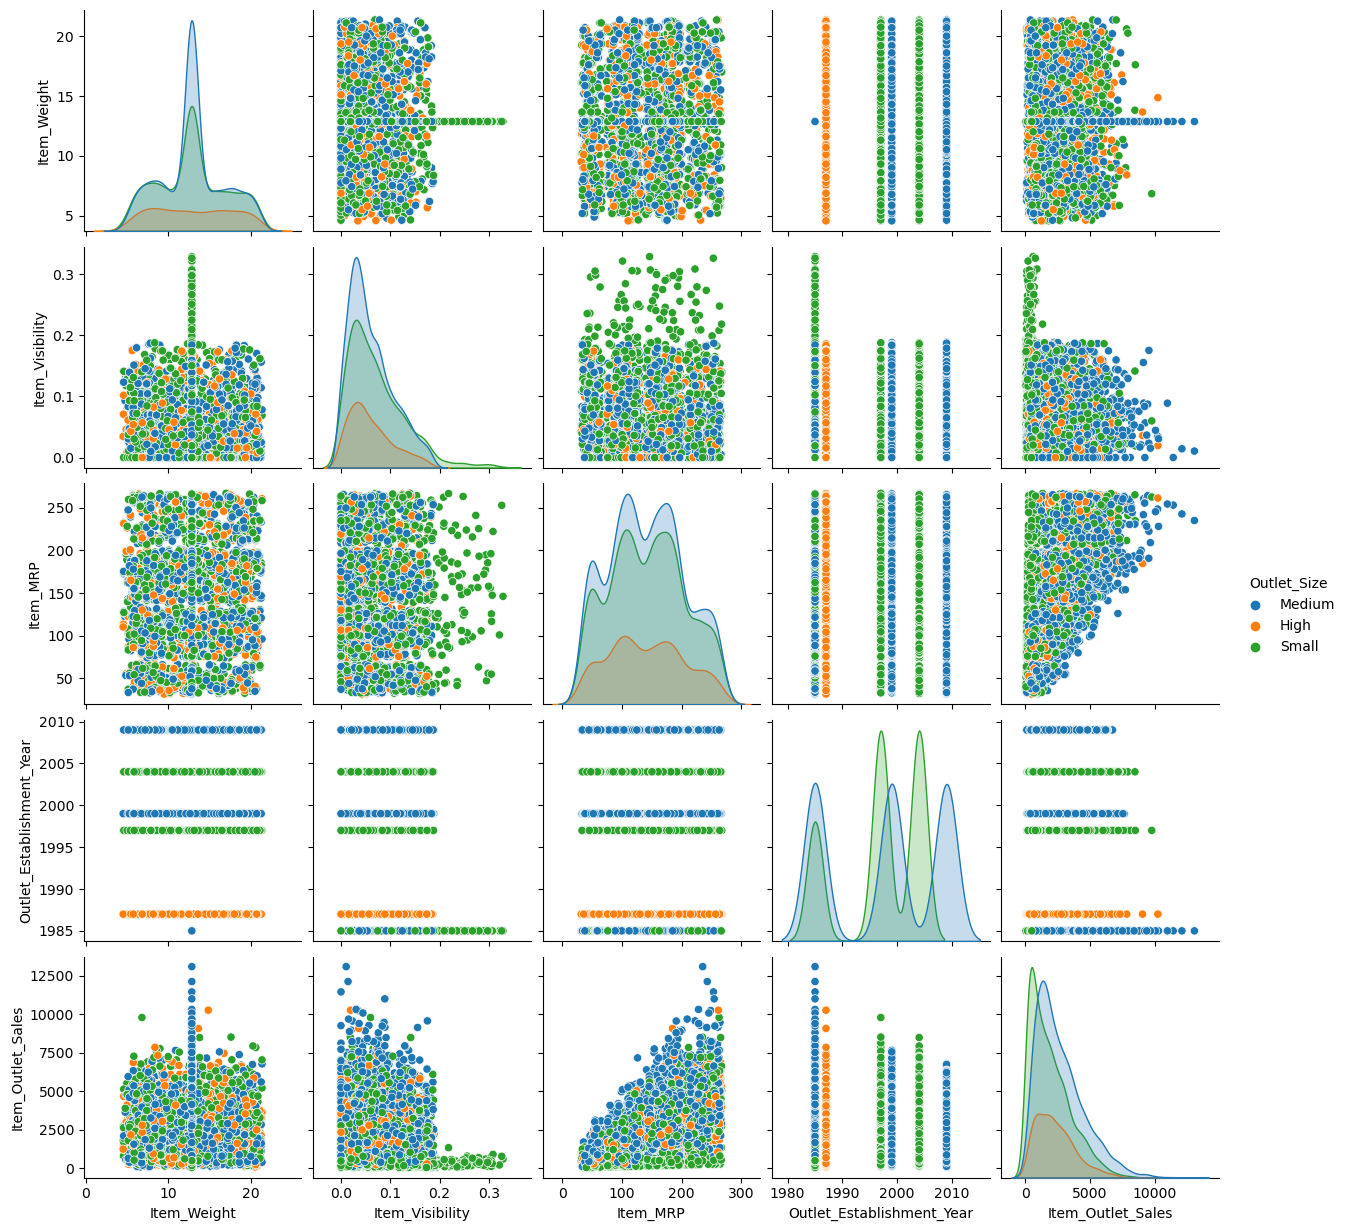

In [97]:
sns.pairplot(df, hue="Outlet_Size")

# EDA


### 1) Relationship between Item Visibility and Sale

#### Expected -  Positive Linear Relation

In [12]:
df=dataset[["Item_Visibility", "Item_Outlet_Sales"]]

In [18]:
(df.Item_Visibility==0).sum()*100/len(df)
# 6% Items have zero visibility
# are they still getting sold??

6.1715358441863195

In [98]:
df["Item_Visibility"].value_counts(bins = 15, sort = False)

(-0.001328, 0.0219]    1665
(0.0219, 0.0438]       1913
(0.0438, 0.0657]       1390
(0.0657, 0.0876]       1124
(0.0876, 0.109]         792
(0.109, 0.131]          626
(0.131, 0.153]          415
(0.153, 0.175]          324
(0.175, 0.197]          133
(0.197, 0.219]           44
(0.219, 0.241]           31
(0.241, 0.263]           20
(0.263, 0.285]           17
(0.285, 0.306]           22
(0.306, 0.328]            7
Name: Item_Visibility, dtype: int64

<Axes: xlabel='Item_Visibility', ylabel='Item_Outlet_Sales'>

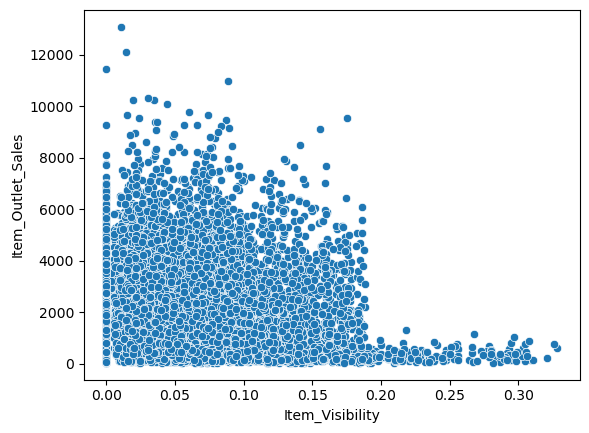

In [33]:
# dataset[["Item_Visibility", "Item_Outlet_Sales"]].plot.scatter(x=0, y=1)
sns.scatterplot(data=dataset[["Item_Visibility", "Item_Outlet_Sales"]],x="Item_Visibility", y="Item_Outlet_Sales")

#### Actual - Don't Understand

### Relationship between Item visibility and MRP

<Axes: xlabel='Item_Visibility', ylabel='Item_MRP'>

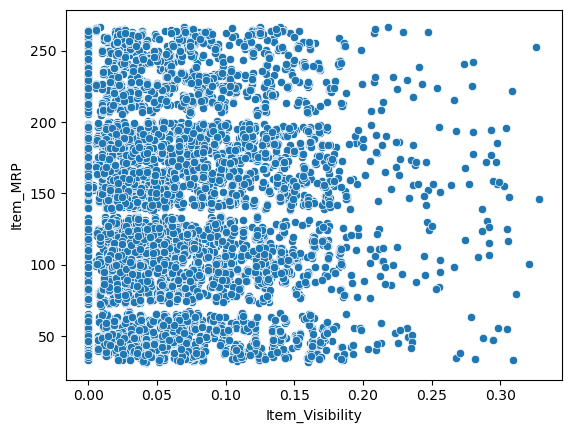

In [32]:
# dataset[["Item_Visibility", "Item_Outlet_Sales"]].plot.scatter(x=0, y=1)
sns.scatterplot(data=dataset[["Item_Visibility", "Item_MRP"]],x="Item_Visibility", y="Item_MRP")

<Axes: ylabel='Count'>

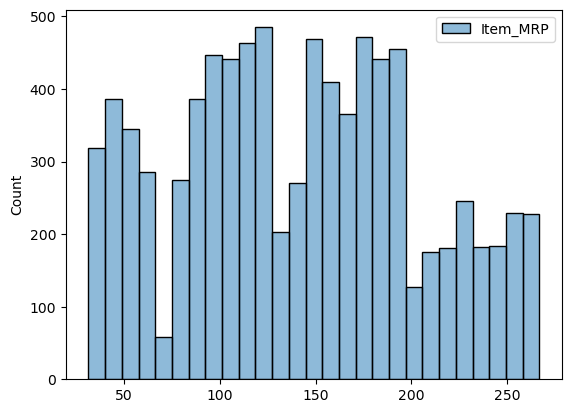

In [29]:
sns.histplot(data=dataset[["Item_MRP"]])

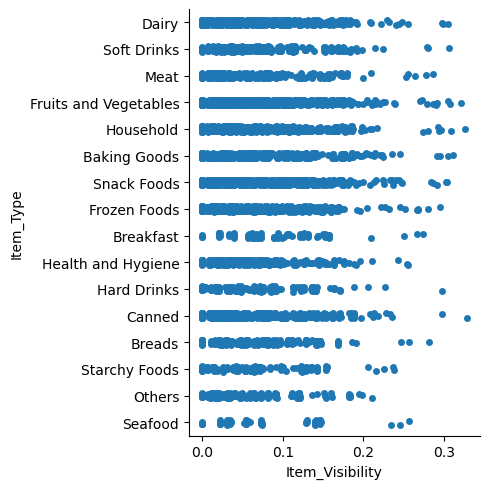

In [33]:
sns.catplot(data=dataset[["Item_Visibility", "Item_Type"]], y="Item_Type", x="Item_Visibility")

### 2) Relationship between Outlet Size and Sale

#### Expected - Positive Relationship

In [67]:
x=dataset[["Outlet_Size", "Item_Outlet_Sales"]]
x=x.dropna()
x

,Outlet_Size,Item_Outlet_Sales
0,Medium,3735.1380
1,Medium,443.4228
2,Medium,2097.2700
4,High,994.7052
5,Medium,556.6088
...,...,...
8517,Small,3608.6360
8518,High,2778.3834
8520,Small,1193.1136
8521,Medium,1845.5976


<Axes: xlabel='Outlet_Size', ylabel='Item_Outlet_Sales'>

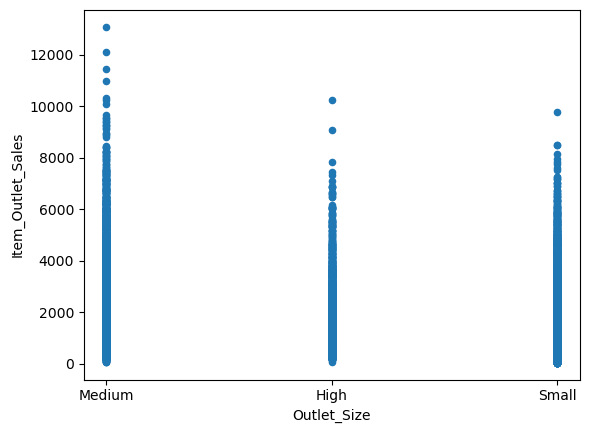

In [69]:
x.plot.scatter(y="Item_Outlet_Sales", x='Outlet_Size')

In [80]:
x.groupby('Outlet_Size').sum()

,Item_Outlet_Sales
Outlet_Size,
High,2.142664e+06
Medium,7.489719e+06
Small,4.566212e+06


<Axes: xlabel='Outlet_Size'>

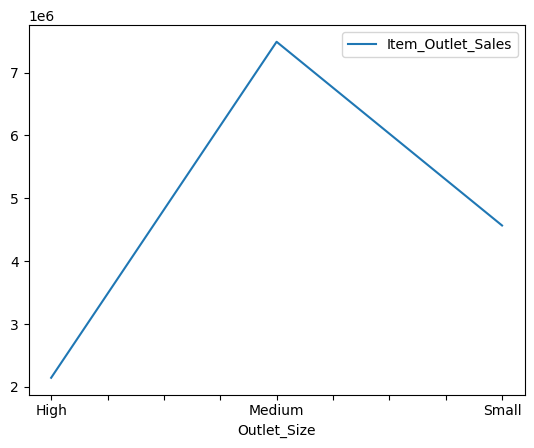

In [79]:
x.groupby('Outlet_Size').sum().plot()

#### Result - Medium sized stores have the highest item sales

# Predict Outlet Type